**Importing the libraries**

In [166]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import json
import glob
from sklearn.model_selection import GridSearchCV

import scipy.signal
import pandas as pd
from scipy.signal import find_peaks

import numpy as np

In [167]:
final_df1 = pd.read_csv('D:\PIP\Data\Processed Data\model_1_data.csv' , index_col = 0)

In [168]:
elimination_df = pd.read_csv('D:\PIP\Data\Processed Data\model_2_data.csv', index_col = 0)

In [169]:
elimination_df['Label'].value_counts()

1    6610
0    2316
Name: Label, dtype: int64

In [5]:
final_df1.isna().sum()

Unnamed: 0                 0
Event_ID                   0
mean_of_sum                0
min_of_sum                 0
max_of_sum                 0
median_of_sum              0
variance_of_sum            1
activity_time              0
std_of_sum                 1
rms_of_sum                 0
crest_factor               0
no_of_peaks                0
PSD_0_to_5Hz_max           0
PSD_0_to_5Hz_min           0
PSD_0_to_5Hz_median        0
PSD_5_to_10Hz_max          0
PSD_5_to_10Hz_min          1
PSD_5_to_10Hz_median       1
PSD_10_to_15Hz_max         2
PSD_10_to_15Hz_min         2
PSD_10_to_15Hz_median      2
PSD_15_to_20Hz_max         1
PSD_15_to_20Hz_min         1
PSD_15_to_20Hz_median      1
Label                      0
Cat_Name                 246
Label E/NE                 0
Range_of_sum               0
dtype: int64

In [6]:
elimination_df.isna().sum()

Unnamed: 0                 0
Event_ID                   0
mean_of_sum                0
min_of_sum                 0
max_of_sum                 0
median_of_sum              0
variance_of_sum            0
activity_time              0
std_of_sum                 0
rms_of_sum                 0
crest_factor               0
no_of_peaks                0
PSD_0_to_5Hz_max           0
PSD_0_to_5Hz_min           0
PSD_0_to_5Hz_median        0
PSD_5_to_10Hz_max          0
PSD_5_to_10Hz_min          0
PSD_5_to_10Hz_median       0
PSD_10_to_15Hz_max         0
PSD_10_to_15Hz_min         0
PSD_10_to_15Hz_median      0
PSD_15_to_20Hz_max         0
PSD_15_to_20Hz_min         0
PSD_15_to_20Hz_median      0
Label                      0
Cat_Name                 166
Label E/NE                 0
Range_of_sum               0
dtype: int64

In [7]:
# dropping null values from the model dataframe for model 1

In [170]:
final_df1 = final_df1.dropna()

In [171]:
final_df1.shape

(12827, 27)

In [10]:
# dropping null values from the model dataframe for model 2

In [11]:
elimination_df = elimination_df.dropna()

In [12]:
elimination_df.shape

(8760, 28)

In [165]:
final_df1.columns

Index(['Event_ID', 'mean_of_sum', 'min_of_sum', 'max_of_sum', 'median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'rms_of_sum',
       'crest_factor', 'no_of_peaks', 'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min',
       'PSD_0_to_5Hz_median', 'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min',
       'PSD_5_to_10Hz_median', 'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min',
       'PSD_10_to_15Hz_median', 'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min',
       'PSD_15_to_20Hz_median', 'Label', 'Cat_Name', 'Label E/NE',
       'Range_of_sum'],
      dtype='object')

# **XG Boost**

**Model building using XG Boost
(First model i.e prediction of elimination and non-elimination)**

In [81]:
X = final_df1[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks', 'rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y = final_df1['Label E/NE'].values

In [82]:
### Creating the train, test and validate split

final_df1 = final_df1.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = final_df1[:int(len(final_df1)*0.6)]
validate = final_df1[int(len(final_df1)*0.6):int(len(final_df1)*0.8)]
test = final_df1[int(len(final_df1)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)

(7696, 28)
(2565, 28)
(2566, 28)


In [83]:
### Separating the target column from the three datasets in X_data and y_data format.

X_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_train = train['Label E/NE']

In [84]:
X_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_validate = validate['Label E/NE']


In [85]:
X_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y_test = test['Label E/NE']

In [86]:
def error_metrics_RF(actual, predicted, X_data):
    print('Accuracy % age: ' + str(np.round(accuracy_score(actual, predicted)*100, 2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(X_data)[:,1]),3)))
    print('\nClassification Report:')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(actual, predicted))
    return "Done"


In [87]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Accuracy % age: 99.29
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2440
           1       0.99      1.00      0.99      5256

    accuracy                           0.99      7696
   macro avg       0.99      0.99      0.99      7696
weighted avg       0.99      0.99      0.99      7696


Confusion Matrix:
[[2411   29]
 [  26 5230]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


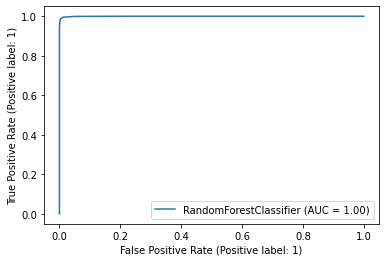

In [90]:
y_train_pred = classifier.predict(X_train)
error_metrics_RF(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 84.37
ROC-AUC Score: 0.861

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       843
           1       0.86      0.92      0.89      1722

    accuracy                           0.84      2565
   macro avg       0.83      0.81      0.82      2565
weighted avg       0.84      0.84      0.84      2565


Confusion Matrix:
[[ 584  259]
 [ 142 1580]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


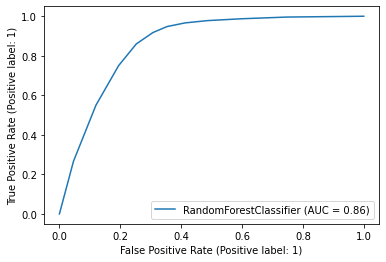

In [92]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_pred = classifier.predict(X_validate)
error_metrics_RF(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 84.61
ROC-AUC Score: 0.859

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       784
           1       0.87      0.92      0.89      1782

    accuracy                           0.85      2566
   macro avg       0.83      0.80      0.81      2566
weighted avg       0.84      0.85      0.84      2566


Confusion Matrix:
[[ 534  250]
 [ 145 1637]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


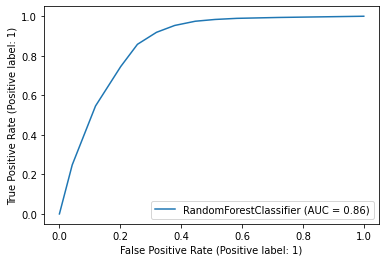

In [93]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_pred = classifier.predict(X_test)
error_metrics_RF(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X_test, y_test)
plt.show()

In [ ]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve



Training
------------------------------------------------------------
Accuracy % age: 96.62
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2440
           1       0.95      1.00      0.98      5256

    accuracy                           0.97      7696
   macro avg       0.98      0.95      0.96      7696
weighted avg       0.97      0.97      0.97      7696


Confusion Matrix:
[[2182  258]
 [   2 5254]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


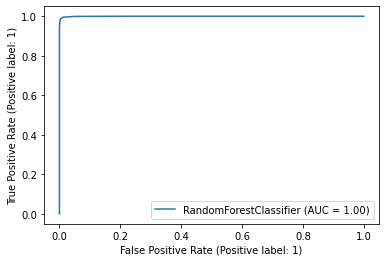

In [96]:
print("\nTraining\n------------------------------------------------------------")
y_train_probability = classifier.predict_proba(X_train)[:,1]
y_train_pred = np.where(y_train_probability >= 0.4, 1, 0)
error_metrics_RF(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 84.17
ROC-AUC Score: 0.861

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       843
           1       0.83      0.97      0.89      1722

    accuracy                           0.84      2565
   macro avg       0.86      0.78      0.80      2565
weighted avg       0.85      0.84      0.83      2565


Confusion Matrix:
[[ 495  348]
 [  58 1664]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


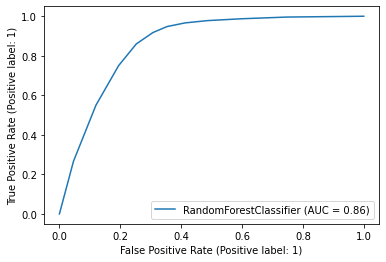

In [97]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_probabillity = classifier.predict_proba(X_validate)[:,1]
y_validate_pred = np.where(y_validate_probabillity >= 0.4, 1, 0)
error_metrics_RF(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 84.61
ROC-AUC Score: 0.859

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       784
           1       0.87      0.92      0.89      1782

    accuracy                           0.85      2566
   macro avg       0.83      0.80      0.81      2566
weighted avg       0.84      0.85      0.84      2566


Confusion Matrix:
[[ 534  250]
 [ 145 1637]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


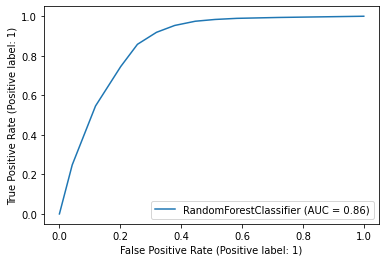

In [98]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_probabillity = classifier.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probabillity >= 0.4, 1, 0)
y_test_pred = classifier.predict(X_test)
error_metrics_RF(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X_test, y_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 99.29
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2440
           1       0.99      1.00      0.99      5256

    accuracy                           0.99      7696
   macro avg       0.99      0.99      0.99      7696
weighted avg       0.99      0.99      0.99      7696


Confusion Matrix:
[[2411   29]
 [  26 5230]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


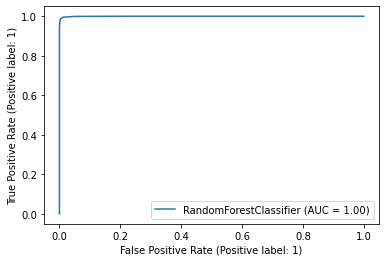

In [99]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

print("\nTraining\n------------------------------------------------------------")
y_train_probabillity = classifier.predict_proba(X_train)[:,1]
y_train_pred = np.where(y_train_probabillity >= 0.6, 1, 0)
error_metrics_RF(y_train, y_train_pred, X_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X_train, y_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 84.37
ROC-AUC Score: 0.861

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       843
           1       0.86      0.92      0.89      1722

    accuracy                           0.84      2565
   macro avg       0.83      0.81      0.82      2565
weighted avg       0.84      0.84      0.84      2565


Confusion Matrix:
[[ 584  259]
 [ 142 1580]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


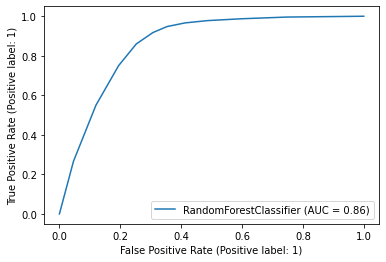

In [100]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y_validate_probabillity = classifier.predict_proba(X_validate)[:,1]
y_validate_pred = np.where(y_validate_probabillity >= 0.6, 1, 0)
error_metrics_RF(y_validate, y_validate_pred, X_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X_validate, y_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 84.61
ROC-AUC Score: 0.859

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       784
           1       0.87      0.92      0.89      1782

    accuracy                           0.85      2566
   macro avg       0.83      0.80      0.81      2566
weighted avg       0.84      0.85      0.84      2566


Confusion Matrix:
[[ 534  250]
 [ 145 1637]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


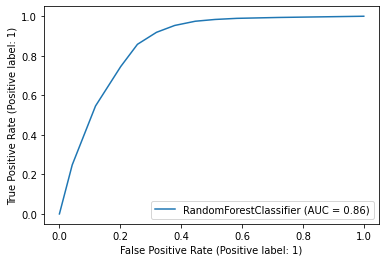

In [101]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y_test_probability = classifier.predict_proba(X_test)[:,1]
y_test_pred = np.where(y_test_probability >= 0.6, 1, 0)
error_metrics_RF(y_test, y_test_pred, X_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X_test, y_test)
plt.show()


**Using standard scalar**


Training
------------------------------------------------------------
Accuracy % age: 99.19
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2440
           1       0.99      1.00      0.99      5256

    accuracy                           0.99      7696
   macro avg       0.99      0.99      0.99      7696
weighted avg       0.99      0.99      0.99      7696


Confusion Matrix:
[[2397   43]
 [  19 5237]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


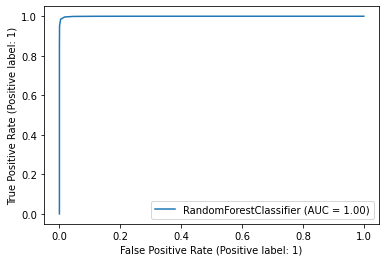

In [102]:
sc = StandardScaler()
X1_train = sc.fit_transform(X_train)
X1_test = sc.transform(X_test)
X1_validate = sc.transform(X_validate)

### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X1_train, y_train)
print("\nTraining\n------------------------------------------------------------")
y1_train_pred = classifier.predict(X1_train)
error_metrics_RF(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X1_train, y_train)
plt.show()



Validation on scaled validation set
------------------------------------------------------------
Accuracy % age: 83.63
ROC-AUC Score: 0.858

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       843
           1       0.86      0.91      0.88      1722

    accuracy                           0.84      2565
   macro avg       0.82      0.80      0.81      2565
weighted avg       0.83      0.84      0.83      2565


Confusion Matrix:
[[ 584  259]
 [ 161 1561]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


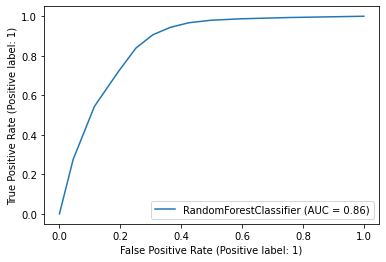

In [103]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation on scaled validation set\n------------------------------------------------------------")
y1_validate_pred = classifier.predict(X1_validate)
error_metrics_RF(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X1_validate, y_validate)
plt.show()


Testing test(scaled)
------------------------------------------------------------
Accuracy % age: 84.57
ROC-AUC Score: 0.857

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       784
           1       0.87      0.92      0.89      1782

    accuracy                           0.85      2566
   macro avg       0.83      0.80      0.81      2566
weighted avg       0.84      0.85      0.84      2566


Confusion Matrix:
[[ 528  256]
 [ 140 1642]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


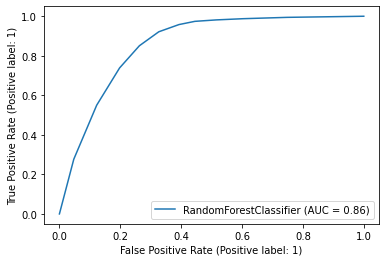

In [104]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting test(scaled)\n------------------------------------------------------------")
y1_test_pred = classifier.predict(X1_test)
error_metrics_RF(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X1_test, y_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 96.4
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2440
           1       0.95      1.00      0.97      5256

    accuracy                           0.96      7696
   macro avg       0.97      0.94      0.96      7696
weighted avg       0.97      0.96      0.96      7696


Confusion Matrix:
[[2164  276]
 [   1 5255]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


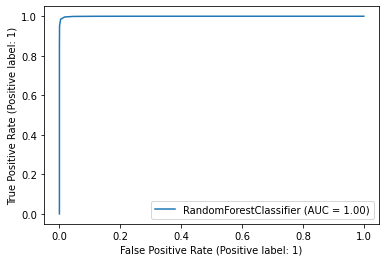

In [105]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_probability = classifier.predict_proba(X1_train)[:,1]
y1_train_pred = np.where(y1_train_probability >= 0.4, 1, 0)
error_metrics_RF(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X1_train, y_train)
plt.show()



Validation
------------------------------------------------------------
Accuracy % age: 83.82
ROC-AUC Score: 0.858

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       843
           1       0.82      0.97      0.89      1722

    accuracy                           0.84      2565
   macro avg       0.86      0.77      0.79      2565
weighted avg       0.85      0.84      0.83      2565


Confusion Matrix:
[[ 485  358]
 [  57 1665]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


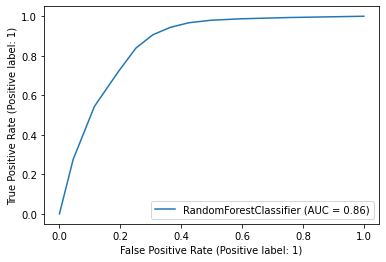

In [106]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y1_validate_probabillity = classifier.predict_proba(X1_validate)[:,1]
y1_validate_pred = np.where(y1_validate_probabillity >= 0.4, 1, 0)
error_metrics_RF(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X1_validate, y_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 84.57
ROC-AUC Score: 0.857

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       784
           1       0.87      0.92      0.89      1782

    accuracy                           0.85      2566
   macro avg       0.83      0.80      0.81      2566
weighted avg       0.84      0.85      0.84      2566


Confusion Matrix:
[[ 528  256]
 [ 140 1642]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


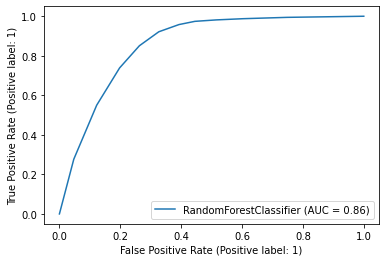

In [107]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y1_test_probabillity = classifier.predict_proba(X1_test)[:,1]
y1_test_pred = np.where(y1_test_probabillity >= 0.4, 1, 0)
y1_test_pred = classifier.predict(X1_test)
error_metrics_RF(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X1_test, y_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 99.19
ROC-AUC Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2440
           1       0.99      1.00      0.99      5256

    accuracy                           0.99      7696
   macro avg       0.99      0.99      0.99      7696
weighted avg       0.99      0.99      0.99      7696


Confusion Matrix:
[[2397   43]
 [  19 5237]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


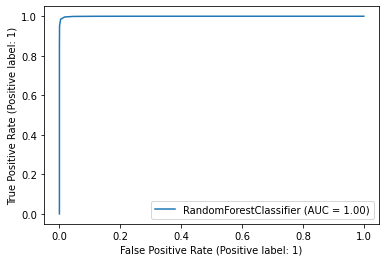

In [108]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X1_train, y_train) 
classifier.fit(X1_train, y_train)

print("\nTraining\n------------------------------------------------------------")
y1_train_probabillity = classifier.predict_proba(X1_train)[:,1]
y1_train_pred = np.where(y1_train_probabillity >= 0.6, 1, 0)
error_metrics_RF(y_train, y1_train_pred, X1_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X1_train, y_train)
plt.show()



Validation
------------------------------------------------------------
Accuracy % age: 83.63
ROC-AUC Score: 0.858

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       843
           1       0.86      0.91      0.88      1722

    accuracy                           0.84      2565
   macro avg       0.82      0.80      0.81      2565
weighted avg       0.83      0.84      0.83      2565


Confusion Matrix:
[[ 584  259]
 [ 161 1561]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


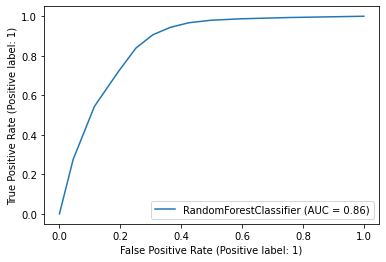

In [109]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y1_validate_probabillity = classifier.predict_proba(X1_validate)[:,1]
y1_validate_pred = np.where(y1_validate_probabillity >= 0.6, 1, 0)
error_metrics_RF(y_validate, y1_validate_pred, X1_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X1_validate, y_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 84.57
ROC-AUC Score: 0.857

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.67      0.73       784
           1       0.87      0.92      0.89      1782

    accuracy                           0.85      2566
   macro avg       0.83      0.80      0.81      2566
weighted avg       0.84      0.85      0.84      2566


Confusion Matrix:
[[ 528  256]
 [ 140 1642]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


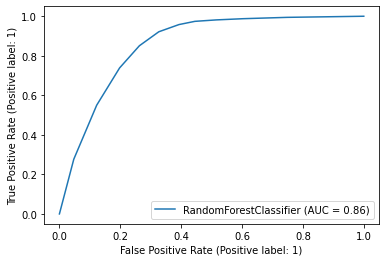

In [110]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y1_test_probability = classifier.predict_proba(X1_test)[:,1]
y1_test_pred = np.where(y1_test_probability >= 0.6, 1, 0)
error_metrics_RF(y_test, y1_test_pred, X1_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X1_test, y_test)
plt.show()


**XG Boost Second Model**

**Model building using XG Boost(Second model i.e prediction of urination and defecation)**

In [111]:
X2 = elimination_df[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']].values
y2 = elimination_df['Label'].values


In [112]:
### Creating the train, test and validate split

elimination_df = elimination_df.sample(frac = 1, random_state = 101)

### Keeping first 60% rows for training, next 20% for validation and last 20% for testing sets.

train = elimination_df[:int(len(elimination_df)*0.6)]
validate = elimination_df[int(len(elimination_df)*0.6):int(len(elimination_df)*0.8)]
test = elimination_df[int(len(elimination_df)*0.8):]

print(train.shape)
print(validate.shape)
print(test.shape)


(5256, 28)
(1752, 28)
(1752, 28)


In [113]:
### Separating the target column from the three datasets in X_data and y_data format.

X2_train = train[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y2_train = train['Label']


X2_validate = validate[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y2_validate = validate['Label']


X2_test = test[['mean_of_sum','min_of_sum','max_of_sum','median_of_sum',
       'variance_of_sum', 'activity_time', 'std_of_sum', 'no_of_peaks','rms_of_sum', 'crest_factor', 'Range_of_sum',
       'PSD_0_to_5Hz_max', 'PSD_0_to_5Hz_min', 'PSD_0_to_5Hz_median',
       'PSD_5_to_10Hz_max', 'PSD_5_to_10Hz_min', 'PSD_5_to_10Hz_median',
       'PSD_10_to_15Hz_max', 'PSD_10_to_15Hz_min', 'PSD_10_to_15Hz_median',
       'PSD_15_to_20Hz_max', 'PSD_15_to_20Hz_min', 'PSD_15_to_20Hz_median']]
y2_test = test['Label']



Training
------------------------------------------------------------
Accuracy % age: 98.88
ROC-AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1372
           1       0.99      0.99      0.99      3884

    accuracy                           0.99      5256
   macro avg       0.98      0.99      0.99      5256
weighted avg       0.99      0.99      0.99      5256


Confusion Matrix:
[[1351   21]
 [  38 3846]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


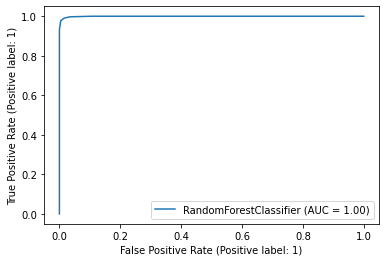

In [114]:
### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_pred = classifier.predict(X2_train)
error_metrics_RF(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 84.53
ROC-AUC Score: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       460
           1       0.89      0.90      0.90      1292

    accuracy                           0.85      1752
   macro avg       0.80      0.80      0.80      1752
weighted avg       0.84      0.85      0.84      1752


Confusion Matrix:
[[ 321  139]
 [ 132 1160]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


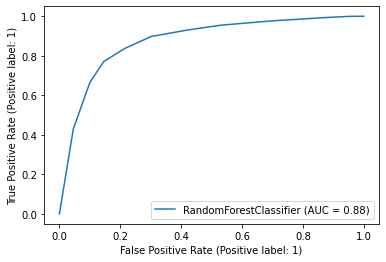

In [115]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_pred = classifier.predict(X2_validate)
error_metrics_RF(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X2_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 82.36
ROC-AUC Score: 0.871

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       440
           1       0.89      0.87      0.88      1312

    accuracy                           0.82      1752
   macro avg       0.77      0.78      0.77      1752
weighted avg       0.83      0.82      0.83      1752


Confusion Matrix:
[[ 302  138]
 [ 171 1141]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


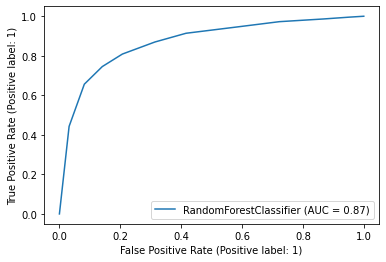

In [116]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_pred = classifier.predict(X2_test)
error_metrics_RF(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X2_test, y2_test)
plt.show()



Training
------------------------------------------------------------
Accuracy % age: 97.2
ROC-AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1372
           1       0.96      1.00      0.98      3884

    accuracy                           0.97      5256
   macro avg       0.98      0.95      0.96      5256
weighted avg       0.97      0.97      0.97      5256


Confusion Matrix:
[[1225  147]
 [   0 3884]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


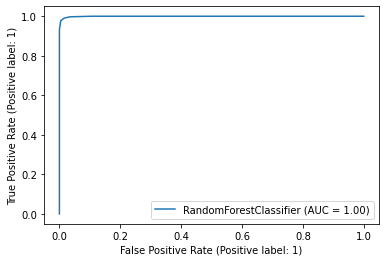

In [117]:
### Trying the same with probability thresholds as 0.4 and 0.6.

### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_probability = classifier.predict_proba(X2_train)[:,1]
y2_train_pred = np.where(y2_train_probability >= 0.4, 1, 0)
error_metrics_RF(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X2_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 82.71
ROC-AUC Score: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.47      0.59       460
           1       0.83      0.96      0.89      1292

    accuracy                           0.83      1752
   macro avg       0.81      0.71      0.74      1752
weighted avg       0.82      0.83      0.81      1752


Confusion Matrix:
[[ 215  245]
 [  58 1234]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


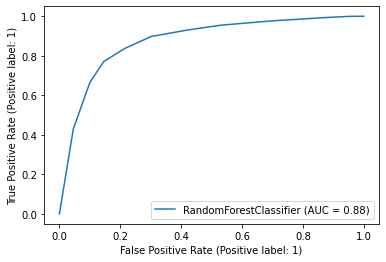

In [118]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_probabillity = classifier.predict_proba(X2_validate)[:,1]
y2_validate_pred = np.where(y2_validate_probabillity >= 0.4, 1, 0)
error_metrics_RF(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X2_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 82.36
ROC-AUC Score: 0.871

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       440
           1       0.89      0.87      0.88      1312

    accuracy                           0.82      1752
   macro avg       0.77      0.78      0.77      1752
weighted avg       0.83      0.82      0.83      1752


Confusion Matrix:
[[ 302  138]
 [ 171 1141]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


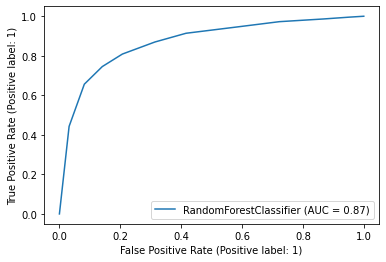

In [119]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_probabillity = classifier.predict_proba(X2_test)[:,1]
y2_test_pred = np.where(y2_test_probabillity >= 0.4, 1, 0)
y2_test_pred = classifier.predict(X2_test)
error_metrics_RF(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X2_test, y2_test)
plt.show()


Training
------------------------------------------------------------
Accuracy % age: 98.88
ROC-AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1372
           1       0.99      0.99      0.99      3884

    accuracy                           0.99      5256
   macro avg       0.98      0.99      0.99      5256
weighted avg       0.99      0.99      0.99      5256


Confusion Matrix:
[[1351   21]
 [  38 3846]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


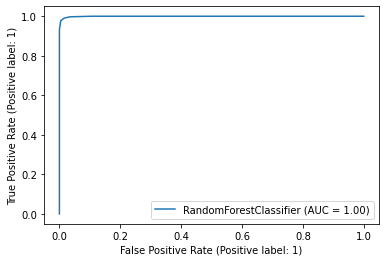

In [120]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X2_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y2_train_probabillity = classifier.predict_proba(X2_train)[:,1]
y2_train_pred = np.where(y2_train_probabillity >= 0.6, 1, 0)
error_metrics_RF(y2_train, y2_train_pred, X2_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X2_train, y2_train)
plt.show()



Validation
------------------------------------------------------------
Accuracy % age: 84.53
ROC-AUC Score: 0.876

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       460
           1       0.89      0.90      0.90      1292

    accuracy                           0.85      1752
   macro avg       0.80      0.80      0.80      1752
weighted avg       0.84      0.85      0.84      1752


Confusion Matrix:
[[ 321  139]
 [ 132 1160]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


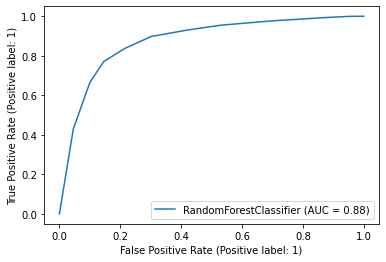

In [121]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y2_validate_probabillity = classifier.predict_proba(X2_validate)[:,1]
y2_validate_pred = np.where(y2_validate_probabillity >= 0.6, 1, 0)
error_metrics_RF(y2_validate, y2_validate_pred, X2_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X2_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 82.36
ROC-AUC Score: 0.871

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       440
           1       0.89      0.87      0.88      1312

    accuracy                           0.82      1752
   macro avg       0.77      0.78      0.77      1752
weighted avg       0.83      0.82      0.83      1752


Confusion Matrix:
[[ 302  138]
 [ 171 1141]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


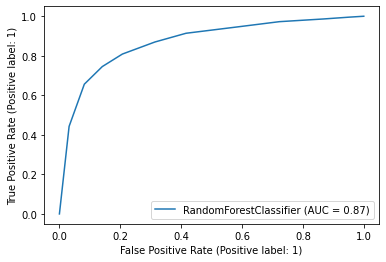

In [122]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y2_test_probability = classifier.predict_proba(X2_test)[:,1]
y2_test_pred = np.where(y2_test_probability >= 0.6, 1, 0)
error_metrics_RF(y2_test, y2_test_pred, X2_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X2_test, y2_test)
plt.show()


**Using Standard Scalar**

In [123]:
X22_train = sc.fit_transform(X2_train)
X22_test = sc.transform(X2_test)
X22_validate = sc.transform(X2_validate)



Training
------------------------------------------------------------
Accuracy % age: 99.01
ROC-AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       1.00      0.99      0.99      3884

    accuracy                           0.99      5256
   macro avg       0.99      0.99      0.99      5256
weighted avg       0.99      0.99      0.99      5256


Confusion Matrix:
[[1353   19]
 [  33 3851]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


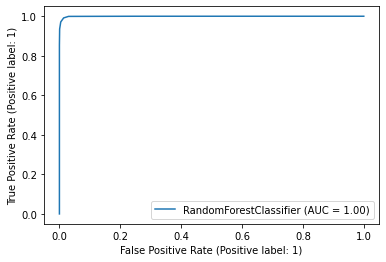

In [128]:
### Training Dataset metrics and ROC-AUC Curve
classifier.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_pred = classifier.predict(X22_train)
error_metrics_RF(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X22_train, y2_train)
plt.show()


Validation on scaled validation set
------------------------------------------------------------
Accuracy % age: 83.22
ROC-AUC Score: 0.872

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       460
           1       0.88      0.89      0.89      1292

    accuracy                           0.83      1752
   macro avg       0.78      0.78      0.78      1752
weighted avg       0.83      0.83      0.83      1752


Confusion Matrix:
[[ 307  153]
 [ 141 1151]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


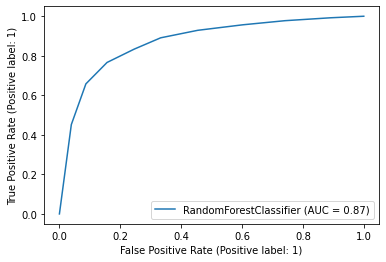

In [129]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation on scaled validation set\n------------------------------------------------------------")
y22_validate_pred = classifier.predict(X22_validate)
error_metrics_RF(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X22_validate, y2_validate)
plt.show()


Testing test(scaled)
------------------------------------------------------------
Accuracy % age: 82.02
ROC-AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       440
           1       0.89      0.87      0.88      1312

    accuracy                           0.82      1752
   macro avg       0.76      0.77      0.77      1752
weighted avg       0.82      0.82      0.82      1752


Confusion Matrix:
[[ 297  143]
 [ 172 1140]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


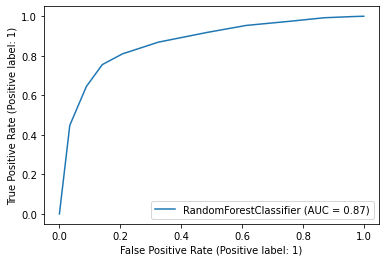

In [130]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting test(scaled)\n------------------------------------------------------------")
y22_test_pred = classifier.predict(X22_test)
error_metrics_RF(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X22_test, y2_test)
plt.show()



Training
------------------------------------------------------------
Accuracy % age: 97.45
ROC-AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1372
           1       0.97      1.00      0.98      3884

    accuracy                           0.97      5256
   macro avg       0.98      0.95      0.97      5256
weighted avg       0.98      0.97      0.97      5256


Confusion Matrix:
[[1240  132]
 [   2 3882]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


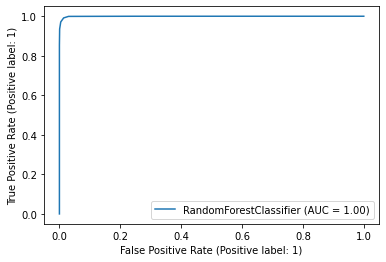

In [131]:
### threshold = 0.4

### Training Dataset metrics and ROC-AUC Curve
classifier.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_probability = classifier.predict_proba(X22_train)[:,1]
y22_train_pred = np.where(y22_train_probability >= 0.4, 1, 0)
error_metrics_RF(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X22_train, y2_train)
plt.show()


Validation
------------------------------------------------------------
Accuracy % age: 80.99
ROC-AUC Score: 0.872

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.40      0.52       460
           1       0.82      0.96      0.88      1292

    accuracy                           0.81      1752
   macro avg       0.79      0.68      0.70      1752
weighted avg       0.80      0.81      0.79      1752


Confusion Matrix:
[[ 183  277]
 [  56 1236]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


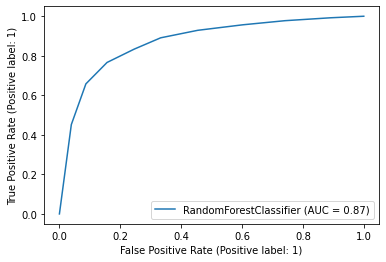

In [132]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y22_validate_probabillity = classifier.predict_proba(X22_validate)[:,1]
y22_validate_pred = np.where(y22_validate_probabillity >= 0.4, 1, 0)
error_metrics_RF(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X22_validate, y2_validate)
plt.show()


Testing
------------------------------------------------------------
Accuracy % age: 82.02
ROC-AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       440
           1       0.89      0.87      0.88      1312

    accuracy                           0.82      1752
   macro avg       0.76      0.77      0.77      1752
weighted avg       0.82      0.82      0.82      1752


Confusion Matrix:
[[ 297  143]
 [ 172 1140]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


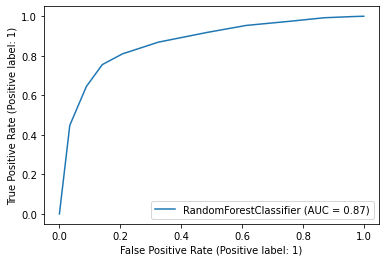

In [133]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y22_test_probabillity = classifier.predict_proba(X22_test)[:,1]
y22_test_pred = np.where(y22_test_probabillity >= 0.4, 1, 0)
y22_test_pred = classifier.predict(X22_test)
error_metrics_RF(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X22_test, y2_test)
plt.show()



Training
------------------------------------------------------------
Accuracy % age: 99.01
ROC-AUC Score: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1372
           1       1.00      0.99      0.99      3884

    accuracy                           0.99      5256
   macro avg       0.99      0.99      0.99      5256
weighted avg       0.99      0.99      0.99      5256


Confusion Matrix:
[[1353   19]
 [  33 3851]]

 ROC-AUC Curve for the training set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


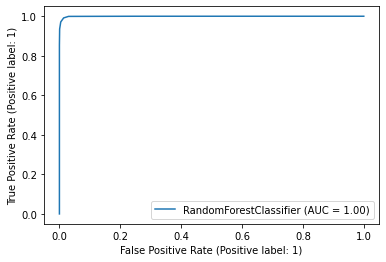

In [134]:
### threshold = 0.6

### Training Dataset metrics and ROC-AUC Curve

classifier.fit(X22_train, y2_train)

print("\nTraining\n------------------------------------------------------------")
y22_train_probabillity = classifier.predict_proba(X22_train)[:,1]
y22_train_pred = np.where(y22_train_probabillity >= 0.6, 1, 0)
error_metrics_RF(y2_train, y22_train_pred, X22_train)

print("\n ROC-AUC Curve for the training set")
plot_roc_curve(classifier, X22_train, y2_train)
plt.show()



Validation
------------------------------------------------------------
Accuracy % age: 83.22
ROC-AUC Score: 0.872

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       460
           1       0.88      0.89      0.89      1292

    accuracy                           0.83      1752
   macro avg       0.78      0.78      0.78      1752
weighted avg       0.83      0.83      0.83      1752


Confusion Matrix:
[[ 307  153]
 [ 141 1151]]

 ROC-AUC Curve for the validation set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


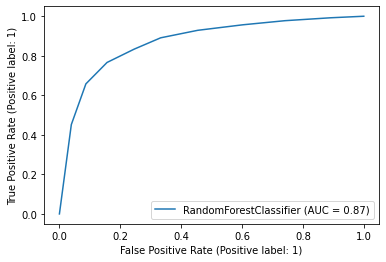

In [136]:
### Validation Dataset metrics and ROC-AUC Curve
print("\nValidation\n------------------------------------------------------------")
y22_validate_probabillity = classifier.predict_proba(X22_validate)[:,1]
y22_validate_pred = np.where(y22_validate_probabillity >= 0.6, 1, 0)
error_metrics_RF(y2_validate, y22_validate_pred, X22_validate)

print("\n ROC-AUC Curve for the validation set")
plot_roc_curve(classifier, X22_validate, y2_validate)
plt.show()



Testing
------------------------------------------------------------
Accuracy % age: 82.02
ROC-AUC Score: 0.867

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       440
           1       0.89      0.87      0.88      1312

    accuracy                           0.82      1752
   macro avg       0.76      0.77      0.77      1752
weighted avg       0.82      0.82      0.82      1752


Confusion Matrix:
[[ 297  143]
 [ 172 1140]]

 ROC-AUC Curve for the testing set


Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


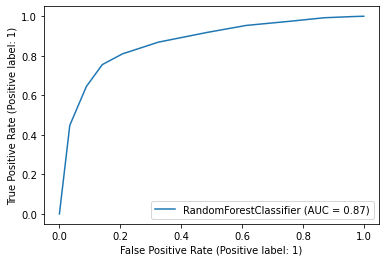

In [138]:
### Testing Dataset metrics and ROC-AUC Curve
print("\nTesting\n------------------------------------------------------------")
y22_test_probability = classifier.predict_proba(X22_test)[:,1]
y22_test_pred = np.where(y22_test_probability >= 0.6, 1, 0)
error_metrics_RF(y2_test, y22_test_pred, X22_test)

print("\n ROC-AUC Curve for the testing set")
plot_roc_curve(classifier, X22_test, y2_test)
plt.show()